In [0]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
# from matplotlib.pyplot import figure
import numpy as np
import os


In [0]:
width = 92
height = 112
dataset_path = "/content/images1/"
dataset_dir = os.listdir(dataset_path)


Train images: 


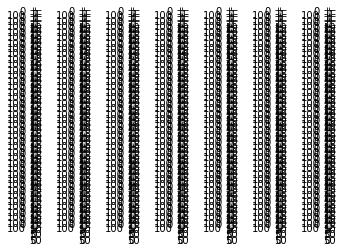

In [0]:
print("Train images: ")
train_image_names = []
for i in range(1,41):
  for j in range(1,8):
    train_image_names.append("s" + str(i) + str(j) + ".pgm")
training_tensor = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)
for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(40,7,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

[85.41071429 85.33928571 85.65357143 ... 74.75714286 74.16785714
 73.35714286]


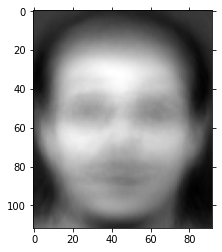

In [0]:
mean_face = np.zeros((1,height*width))
for i in training_tensor:
  mean_face = np.add(mean_face, i)
mean_face = np.divide(mean_face, float(len(train_image_names))).flatten()
print(mean_face)
plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [0]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))
for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

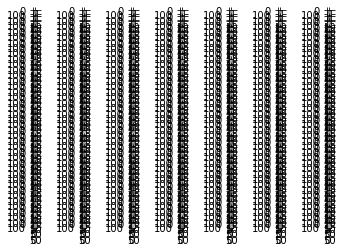

In [0]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(40,7,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()


In [0]:
cov_matrix = np.cov(normalised_training_tensor)
# cov_matrix = np.divide(cov_matrix, 39.0)
print("covariance matrix is : \n%s" %cov_matrix)

covariance matrix is : 
[[1173.9975314   102.52140287  631.59979291 ...  -85.1173585
   -87.87875694 -107.4215613 ]
 [ 102.52140287 1312.51610175  349.47666314 ... -275.61797825
    39.91973518 -136.96233886]
 [ 631.59979291  349.47666314 1524.97755225 ...  -79.19042877
   127.13595244  -63.26827588]
 ...
 [ -85.1173585  -275.61797825  -79.19042877 ...  760.33762541
   239.81856963  402.8441774 ]
 [ -87.87875694   39.91973518  127.13595244 ...  239.81856963
  1158.86687475  133.66269201]
 [-107.4215613  -136.96233886  -63.26827588 ...  402.8441774
   133.66269201  872.08517592]]


In [0]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
# print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
# print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

In [0]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort(reverse=True)
# print(eig_pairs)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Cumulative proportion of variance explained vector: 
[0.17863171 0.26278985 0.33817574 0.39949862 0.43812363 0.47122976
 0.49974361 0.52533826 0.5464493  0.56477923 0.58090508 0.59467416
 0.60741818 0.61874389 0.62958149 0.64017326 0.65021504 0.65952569
 0.66821112 0.67682097 0.68423375 0.69123138 0.6979532  0.70435462
 0.71052256 0.7163882  0.72218051 0.72778593 0.73330986 0.73840847
 0.7434169  0.74821622 0.75286109 0.7573924  0.7616712  0.76585854
 0.76991494 0.77386639 0.77768326 0.78136715 0.78492194 0.78838692
 0.79176015 0.79506845 0.79827653 0.80144634 0.80445202 0.80741725
 0.8102552  0.81302322 0.81571134 0.81836923 0.82093806 0.82343706
 0.82587463 0.82827559 0.8306181  0.83292479 0.83519556 0.83741742
 0.83959762 0.84172893 0.84382387 0.84587412 0.84789499 0.84985102
 0.8517585  0.85364071 0.85548037 0.85728864 0.85909459 0.86087657
 0.86263109 0.86437264 0.86610416 0.86777866 0.86943065 0.8710362
 0.87263411 0.8742184  0.87577954 0.8773082  0.87881359 0.88029731
 0.8817384

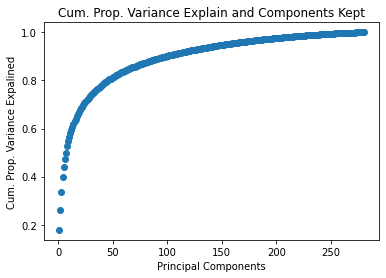

In [0]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)
# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()


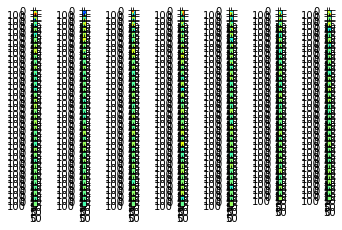

In [0]:
 reduced_data = np.array(eigvectors_sort[:250]).transpose()
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(40,7,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()


In [0]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[-14001836.74980565, -48181085.57652815,  -2127414.79267809, ...,
           749299.55750518,    467796.30239469,   1120294.35260848],
       [-50277053.23555867, -14223569.42798782,   7021600.38084681, ...,
          1802253.28298777,   1045677.06044278,   2686195.57925193],
       [-50154017.34854067, -39548844.78478783,  11143604.08732143, ...,
          1029750.07504847,    619650.13903053,   1546046.57465855],
       ...,
       [  2068954.60428002, -14339109.13934275,  36618231.56096358, ...,
           754302.99785018,    431680.47923483,   1260569.7708888 ],
       [  5439727.89467933,   4824360.50250842,  34610349.93873717, ...,
           466375.70278932,    254900.49016185,    540478.38110507],
       [ -1349103.06852405,  -7949738.88914691,  33232806.01605836, ...,
           642823.02977958,    527948.9556635 ,   1167212.19091508]])

In [0]:
unknown_face = plt.imread('/content/10.pgm')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
# print(unknown_face_vector)
# print("lol")
# print(normalised_training_tensor[0])

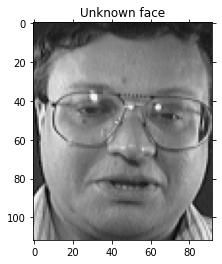

In [0]:
plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

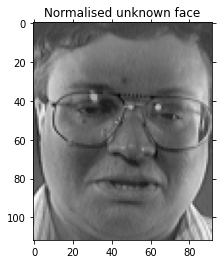

In [0]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [0]:
w_unknown = np.dot(proj_data, normalised_uface_vector)
# w_unknown

[212]


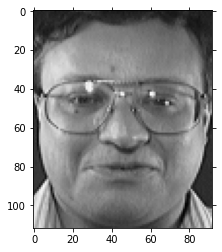

In [0]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
# print(min(norms))
# print(norms)
i, = np.where(np.isclose(norms, min(norms)))
print(i)
img = training_tensor[i].reshape(height,width)
# plt.subplot(40,8,1+i)
plt.imshow(img, cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()
